In [55]:
!pip install kafka-python

In [56]:
!pip install pyspark

# **1) Running Zoopkeeper and KafkaProducer**

In [57]:
from kafka import KafkaProducer
import pandas as pd

In [58]:
!curl -sSOL https://archive.apache.org/dist/kafka/3.3.1/kafka_2.13-3.3.1.tgz
!tar -xzf kafka_2.13-3.3.1.tgz

In [59]:
!./kafka_2.13-3.3.1/bin/zookeeper-server-start.sh -daemon ./kafka_2.13-3.3.1/config/zookeeper.properties
!./kafka_2.13-3.3.1/bin/kafka-server-start.sh -daemon ./kafka_2.13-3.3.1/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


In [60]:
!pip install yfinance

# **2) Download Each stock with Yfinance and make DataFrame**

In [61]:
import yfinance as yf
import pandas as pd

# Download data for multiple tickers
stocks = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "NVDA", "INTC", "CSCO", "AMGN",
    "GILD", "PYPL", "NFLX", "CMCSA", "PEP", "ADP", "ISRG", "COST", "REGN", "ADBE",
    "ASML", "BIDU", "BIIB", "BMRN", "AVGO", "CHTR", "CHKP", "CTAS",
    "CTSH", "DLTR", "EA", "EBAY", "EXC", "FAST", "META", "FOX", "FOXA", "GILD",
    "HAS", "HSIC", "IDXX", "ILMN", "INCY", "JD", "KLAC", "LBTYA", "LRCX", "MAR", "MCHP",
    "MDLZ", "MNST", "MSFT", "MU", "NCLH", "NFLX", "NTES", "NVDA",
    "NXPI", "ORLY", "PAYX", "PCAR", "PDD", "PYPL", "QCOM", "REGN", "ROST", "SIRI", "SNPS",
    "STX", "SWKS", "TTWO", "TSLA", "TXN", "UAL", "ULTA", "VRSK", "VRSN", "VRTX", "WBA",
    "WDAY", "WDC", "XEL", "XRAY", "ZM"
]

# Create a dictionary to store DataFrames
dfs = {}

# Loop through tickers and download data
for ticker in stocks:
    data = yf.download(ticker, period='1d', interval='1m')
    dfs[ticker] = data


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [62]:
dfs["AMZN"]

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-01-22 09:30:00-05:00,156.889999,157.050003,155.779999,155.789993,155.789993,2454000
2024-01-22 09:31:00-05:00,155.839996,156.119995,155.724396,155.830002,155.830002,414645
2024-01-22 09:32:00-05:00,155.839996,156.186707,155.610001,155.669998,155.669998,341741
2024-01-22 09:33:00-05:00,155.630005,155.699997,155.440002,155.625000,155.625000,356410
2024-01-22 09:34:00-05:00,155.639999,155.778900,155.380005,155.500000,155.500000,301078
...,...,...,...,...,...,...
2024-01-22 15:55:00-05:00,154.625000,154.750000,154.619995,154.708099,154.708099,205240
2024-01-22 15:56:00-05:00,154.699997,154.710007,154.610001,154.615005,154.615005,183505
2024-01-22 15:57:00-05:00,154.615005,154.690002,154.589996,154.675003,154.675003,186538


# **3) Creating kafka topic For each stock**

In [63]:
import subprocess

# Kafka parameters
bootstrap_servers = "localhost:9092"
replication_factor = 1
partitions = 1

# Iterate through the list of topics and create each one
for topic in stocks:
    command = [
        "./kafka_2.13-3.3.1/bin/kafka-topics.sh",
        "--create",
        "--bootstrap-server", bootstrap_servers,
        "--replication-factor", str(replication_factor),
        "--partitions", str(partitions),
        "--topic", topic
    ]
    subprocess.run(command)
    print(f"Created topic: {topic}")


Created topic: AAPL
Created topic: MSFT
Created topic: AMZN
Created topic: GOOGL
Created topic: META
Created topic: TSLA
Created topic: NVDA
Created topic: INTC
Created topic: CSCO
Created topic: AMGN
Created topic: GILD
Created topic: PYPL
Created topic: NFLX
Created topic: CMCSA
Created topic: PEP
Created topic: ADP
Created topic: ISRG
Created topic: COST
Created topic: REGN
Created topic: ADBE
Created topic: ASML
Created topic: BIDU
Created topic: BIIB
Created topic: BMRN
Created topic: AVGO
Created topic: CHTR
Created topic: CHKP
Created topic: CTAS
Created topic: CTSH
Created topic: DLTR
Created topic: EA
Created topic: EBAY
Created topic: EXC
Created topic: FAST
Created topic: META
Created topic: FOX
Created topic: FOXA
Created topic: GILD
Created topic: HAS
Created topic: HSIC
Created topic: IDXX
Created topic: ILMN
Created topic: INCY
Created topic: JD
Created topic: KLAC
Created topic: LBTYA
Created topic: LRCX
Created topic: MAR
Created topic: MCHP
Created topic: MDLZ
Created

# **4) Write to kafka topic**

In [64]:
kafka_data = dfs

# Write stock data to corresponding Kafka topics
def write_to_kafka(topic_name, df):
    producer = KafkaProducer(bootstrap_servers=['localhost:9092'])

    for index, row in df.iterrows():
        index_str = str(index)
        producer.send(topic_name, key=index_str.encode('utf-8'), value=row.to_json().encode('utf-8'))

    producer.flush()
    print("Wrote {0} messages into topic: {1}".format(len(df), topic_name))

# Removing duplicate entries
topics = list(set(stocks))

# Writing data to Kafka for each stock symbol
for symbol in topics:
    if symbol in kafka_data:
        write_to_kafka(symbol, kafka_data[symbol])
    else:
        print(f"No data available for {symbol}")


Wrote 390 messages into topic: CTSH
Wrote 390 messages into topic: PYPL
Wrote 364 messages into topic: VRTX
Wrote 374 messages into topic: PAYX
Wrote 354 messages into topic: BIIB
Wrote 390 messages into topic: AMZN
Wrote 334 messages into topic: FOX
Wrote 372 messages into topic: ILMN
Wrote 378 messages into topic: LRCX
Wrote 375 messages into topic: ROST
Wrote 384 messages into topic: HAS
Wrote 330 messages into topic: VRSK
Wrote 326 messages into topic: HSIC
Wrote 349 messages into topic: KLAC
Wrote 388 messages into topic: DLTR
Wrote 390 messages into topic: FAST
Wrote 372 messages into topic: WDAY
Wrote 390 messages into topic: NFLX
Wrote 390 messages into topic: MDLZ
Wrote 390 messages into topic: SNPS
Wrote 390 messages into topic: BIDU
Wrote 390 messages into topic: TXN
Wrote 385 messages into topic: EA
Wrote 389 messages into topic: SWKS
Wrote 306 messages into topic: ULTA
Wrote 390 messages into topic: MSFT
Wrote 389 messages into topic: ADBE
Wrote 323 messages into topic: CH

# **5) Save datasets in local in xlsx format**

In [65]:
from google.colab import files

# Create a dictionary to store DataFrames for each ticker
dfs = {}

# Fetch data for each ticker and store it in the dictionary
for ticker in stocks:
    data = yf.download(ticker, start="2023-01-01", end="2024-01-01")  # Adjust the date range as needed
    dfs[ticker] = data

# Convert datetime values to be timezone-unaware
for ticker, df in dfs.items():
    df.index = df.index.tz_localize(None)

# Create an Excel writer using Pandas
excel_writer = pd.ExcelWriter('stock_data.xlsx')

# Write each dataframe to a different sheet in the Excel file
for ticker, df in dfs.items():
    df.to_excel(excel_writer, sheet_name=ticker)

# Save the Excel file
excel_writer.save()

# Download the Excel file
files.download('stock_data.xlsx')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **6) Datasets preprocessing**

In [66]:
# Loop through tickers and process data
for ticker, df in dfs.items():
    # Calculating daily returns
    df['Daily Return'] = df['Close'].pct_change()

    # Calculating a simple moving average (20 days)
    df['20 Day MA'] = df['Close'].rolling(window=20).mean()

    # Fill NaN values with the mean of the respective columns
    df['Daily Return'].fillna(df['Daily Return'].mean(), inplace=True)
    df['20 Day MA'].fillna(df['20 Day MA'].mean(), inplace=True)

    df['Volatility'] = df['Daily Return'].rolling(window=20).std()

    df['Volatility'].fillna(df['Volatility'].mean(), inplace=True)

# Example to check the processed data for one stock
print(dfs['AMZN'].head())


                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2023-01-03  85.459999  86.959999  84.209999  85.820000  85.820000  76706000   
2023-01-04  86.550003  86.980003  83.360001  85.139999  85.139999  68885100   
2023-01-05  85.330002  85.419998  83.070000  83.120003  83.120003  67930800   
2023-01-06  83.029999  86.400002  81.430000  86.080002  86.080002  83303400   
2023-01-09  87.459999  89.480003  87.080002  87.360001  87.360001  65266100   

            Daily Return   20 Day MA  Volatility  
Date                                              
2023-01-03      0.002511  121.379161    0.020434  
2023-01-04     -0.007924  121.379161    0.020434  
2023-01-05     -0.023726  121.379161    0.020434  
2023-01-06      0.035611  121.379161    0.020434  
2023-01-09      0.014870  121.379161    0.020434  


# **7) Scaling selected coloumn**

In [67]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

for ticker, df in dfs.items():

    # Columns to scale
    columns_to_scale = ['Close', 'Volume']

    # Create new columns with scaled values
    for column in columns_to_scale:
        new_column_name = f'{column}_scaled'
        df[new_column_name] = scaler.fit_transform(df[[column]])

# Now, each DataFrame in `dfs` will have 'Close_scaled' and 'Volume_scaled' columns with scaled values

new_dfs = dfs


new_dfs["AMZN"]


,Open,High,Low,Close,Adj Close,Volume,Daily Return,20 Day MA,Volatility,Close_scaled,Volume_scaled
Date,,,,,,,,,,,
2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000,0.002511,121.379161,0.020434,0.038055,0.400127
2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100,-0.007924,121.379161,0.020434,0.028471,0.342526
2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800,-0.023726,121.379161,0.020434,0.000000,0.335497
2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400,0.035611,121.379161,0.020434,0.041720,0.448718
2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100,0.014870,121.379161,0.020434,0.059760,0.315871
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,153.770004,154.350006,152.710007,153.419998,153.419998,29480100,-0.002730,148.578999,0.011908,0.990838,0.052305
2023-12-26,153.559998,153.979996,153.029999,153.410004,153.410004,25067200,-0.000065,148.863000,0.011871,0.990698,0.019803
2023-12-27,153.559998,154.779999,153.119995,153.339996,153.339996,31434700,-0.000456,149.178500,0.011782,0.989711,0.066700


# **8) Combine dataframes**

In [68]:
combined_df = pd.DataFrame()

for ticker, df in new_dfs.items():
    features = df[['Close_scaled', 'Volume_scaled', '20 Day MA', 'Volatility']].mean()

    # Create a DataFrame for the stock with its features
    stock_features = pd.DataFrame(features).transpose()
    stock_features['Ticker'] = ticker

    # Append to the combined DataFrame
    combined_df = pd.concat([combined_df, stock_features], ignore_index=True)

# Reset index for the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)


In [69]:
combined_df.head()

,Close_scaled,Volume_scaled,20 Day MA,Volatility,Ticker
0,0.650280,0.269887,173.313477,0.012325,AAPL
1,0.571364,0.256201,314.813851,0.015504,MSFT
2,0.539151,0.268481,121.379161,0.020434,AMZN
3,0.589203,0.189011,119.178106,0.018701,GOOGL
4,0.585171,0.129278,263.196333,0.023193,META


# **9) Creating spark-session**

In [70]:
from pyspark.sql import SparkSession

In [71]:
#Creating spark-session and convert panadas dataFrame to pySpark daraFrame


# Initialize Spark session
spark = SparkSession.builder.appName("ezTeam").getOrCreate()

# Convert pandas DataFrames to Spark DataFrames

spark_dfs = spark.createDataFrame(combined_df)


spark_dfs.show()

+-------------------+-------------------+------------------+--------------------+------+
|       Close_scaled|      Volume_scaled|         20 Day MA|          Volatility|Ticker|
+-------------------+-------------------+------------------+--------------------+------+
| 0.6502804909325659| 0.2698871820058476|173.31347650965571|0.012324561334396284|  AAPL|
| 0.5713635185685527| 0.2562013129999883| 314.8138513375154|0.015503999275763618|  MSFT|
| 0.5391514466438677|0.26848077492454475|121.37916055489411|0.020433816355447037|  AMZN|
| 0.5892031625298031|0.18901144279025667|119.17810630137787|0.018701298871334687| GOOGL|
| 0.5851711472236932|0.12927786152783086| 263.1963333212452| 0.02319294159768478|  META|
| 0.5904515350367509|0.29899532272532625|220.00719449757497|  0.0318304037341652|  TSLA|
| 0.6170944131656533| 0.2045572704803887| 369.0628357032677|0.028491882923624832|  NVDA|
| 0.3451972455996189| 0.2125151046667026| 33.47441336396453| 0.02417861871191645|  INTC|
| 0.4185831497209047|

# **10) Implant K-mean for Clustring**

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Number of clusters
k = 5  # You can vary this number to see different results

# Selecting features for clustering
features_for_clustering = combined_df.drop(['Ticker'], axis=1)

# Handling NaN values
# 1. Fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
features_for_clustering_filled = imputer.fit_transform(features_for_clustering)

# 2. Scale the features (important for KMeans)
scaler = StandardScaler()
features_for_clustering_scaled = scaler.fit_transform(features_for_clustering_filled)


# Applying KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(features_for_clustering_scaled)

# Adding cluster labels to the DataFrame
combined_df['Cluster'] = kmeans.labels_
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(features_for_clustering_scaled)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
# Display stocks in each cluster
for i in range(k):
    print(f"Cluster {i}:")
    print(combined_df[combined_df['Cluster'] == i]['Ticker'].values)
    print()


Cluster 0:
['INTC' 'JD' 'NCLH' 'PDD' 'SIRI' 'ZM']

Cluster 1:
['META' 'PYPL' 'ISRG' 'BIDU' 'DLTR' 'EBAY' 'EXC' 'HAS' 'ILMN' 'LBTYA'
 'NTES' 'SWKS' 'TTWO' 'UAL' 'ULTA' 'WBA' 'WDC' 'XRAY']

Cluster 2:
['CSCO' 'AMGN' 'GILD' 'PEP' 'ADP' 'COST' 'BMRN' 'CHKP' 'CTAS' 'EA' 'FAST'
 'FOX' 'FOXA' 'INCY' 'MAR' 'MU' 'PAYX' 'PCAR' 'QCOM' 'ROST' 'SNPS' 'STX'
 'VRSN' 'VRTX' 'WDAY']

Cluster 3:
['AAPL' 'MSFT' 'AMZN' 'GOOGL' 'TSLA' 'CMCSA' 'BIIB' 'CTSH' 'HSIC' 'MCHP'
 'MDLZ' 'MNST' 'NXPI' 'TXN' 'VRSK' 'XEL']

Cluster 4:
['NVDA' 'NFLX' 'REGN' 'ADBE' 'ASML' 'AVGO' 'CHTR' 'IDXX' 'KLAC' 'LRCX'
 'ORLY']



# **11) Visualization**

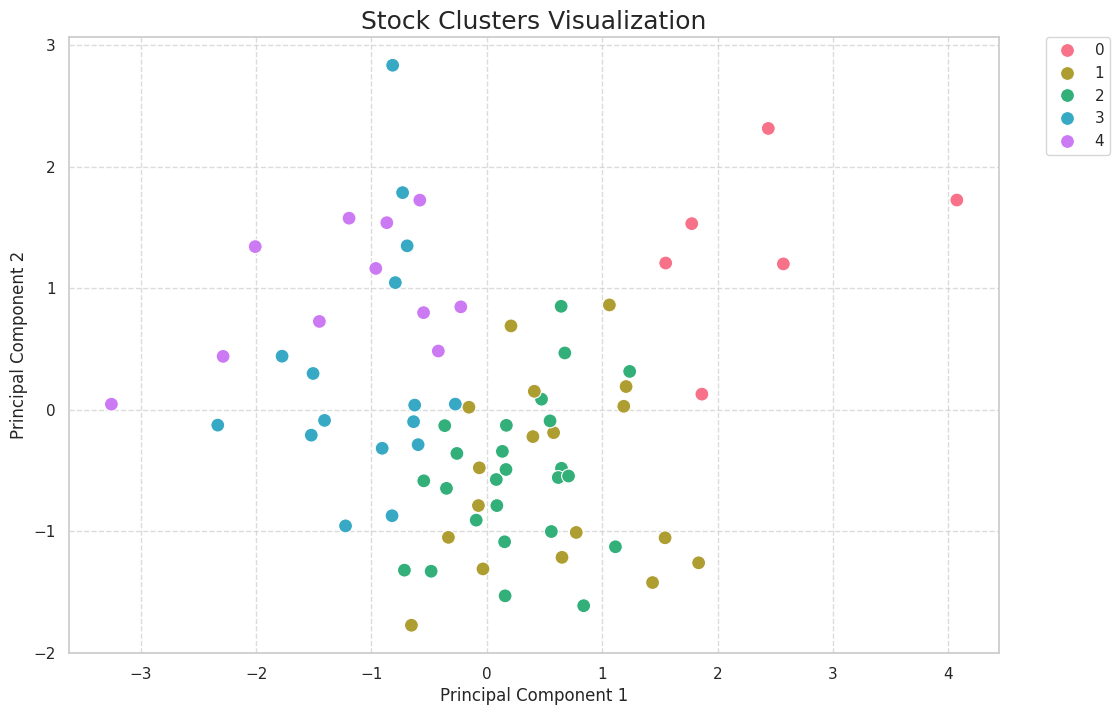

In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_for_clustering_scaled)

# Set a stylish seaborn theme
sns.set(style="whitegrid")

# Define a custom color palette for better visualization
custom_palette = sns.color_palette("husl", n_colors=len(combined_df['Cluster'].unique()))

# Plotting the clusters with improved aesthetics
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=combined_df['Cluster'],
    palette=custom_palette,
    edgecolor='w',  # White border for better visibility
    s=100,  # Increase marker size
)

# Add legend outside the plot for better readability
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Improve readability with axis labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a title with a larger font size
plt.title('Stock Clusters Visualization', fontsize=18)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# **12) Creating Graph**

In [75]:
import networkx as nx

# Assuming 'stock_dataframes' is your dictionary of stock dataframes
# Calculate correlation matrix


correlation_matrix = data.corr()

# Create a graph
G = nx.Graph()

# Add nodes
for stock in data.keys():
    G.add_node(stock)

# Add edges based on correlation threshold
threshold = 0.65  # This is an arbitrary threshold for demonstration
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])



In [76]:
correlation_matrix

,Open,High,Low,Close,Adj Close,Volume,Daily Return,20 Day MA,Volatility,Close_scaled,Volume_scaled
Open,1.000000,0.970597,0.973182,0.934944,0.934944,0.131487,-0.118262,0.686674,0.504709,0.934944,0.131487
High,0.970597,1.000000,0.970625,0.974589,0.974589,0.195739,0.046416,0.668250,0.518841,0.974589,0.195739
Low,0.973182,0.970625,1.000000,0.969307,0.969307,0.077258,0.032180,0.669917,0.455292,0.969307,0.077258
Close,0.934944,0.974589,0.969307,1.000000,1.000000,0.151478,0.200012,0.642934,0.471893,1.000000,0.151478
Adj Close,0.934944,0.974589,0.969307,1.000000,1.000000,0.151478,0.200012,0.642934,0.471893,1.000000,0.151478
Volume,0.131487,0.195739,0.077258,0.151478,0.151478,1.000000,0.046278,0.001147,0.160819,0.151478,1.000000
Daily Return,-0.118262,0.046416,0.032180,0.200012,0.200012,0.046278,1.000000,-0.130624,-0.089466,0.200012,0.046278
20 Day MA,0.686674,0.668250,0.669917,0.642934,0.642934,0.001147,-0.130624,1.000000,0.628198,0.642934,0.001147
Volatility,0.504709,0.518841,0.455292,0.471893,0.471893,0.160819,-0.089466,0.628198,1.000000,0.471893,0.160819
Close_scaled,0.934944,0.974589,0.969307,1.000000,1.000000,0.151478,0.200012,0.642934,0.471893,1.000000,0.151478


# **13) Apply comunity detection algorithm**

In [77]:
from networkx.algorithms.community import girvan_newman
# Apply the Girvan-Newman algorithm
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
detected_communities = sorted(map(sorted, next_level_communities))

# Print the detected communities
print("Detected Communities:")
for i, community in enumerate(detected_communities, start=1):
    print(f"Community {i}: {community}")

Detected Communities:
Community 1: ['20 Day MA']
Community 2: ['Adj Close', 'Close', 'Close_scaled', 'High', 'Low']
Community 3: ['Daily Return']
Community 4: ['Open']
Community 5: ['Volatility']
Community 6: ['Volume', 'Volume_scaled']


# **14) Clustering Coefficient**

In [78]:
# Calculate clustering coefficient for each node
clustering_coeffs = nx.clustering(G)



# Average clustering coefficient for the graph
avg_clustering_coeff = nx.average_clustering(G)

print("Average Clustering Coefficient:", avg_clustering_coeff)


Average Clustering Coefficient: 0.5818181818181819


# **15) Separability**

In [79]:
def calculate_separability(graph, communities):
    separability = []
    for community in communities:
        for node in community:
            shortest_paths = nx.shortest_path_length(graph, source=node)
            for target, path_length in shortest_paths.items():
                if target not in community:
                    separability.append(path_length)
    average_separability = sum(separability) / len(separability)
    return average_separability

# Calculate separability
separability = calculate_separability(G, next_level_communities)
print("Average Separability:", separability)


Average Separability: 1.2727272727272727


# **16) Fractions over Median Degree**

In [80]:
import numpy as np
def fraction_over_median_degree(graph, communities):
    fractions = []
    for community in communities:
        degrees = [graph.degree(node) for node in community]
        if len(degrees) > 1 and np.median(degrees) != 0:
            avg_degree = sum(degrees) / len(degrees)
            median_degree = np.median(degrees)
            fractions.append(avg_degree / median_degree)
        else:
            fractions.append(np.nan)  # or some other default value

    return fractions

fractions = fraction_over_median_degree(G, next_level_communities)
print("Fractions over Median Degree:", fractions)



Fractions over Median Degree: [nan, 1.08, 1.0, nan, nan, nan]


# **17) Conductance, Normalized Cut, Cut Ratio**

In [81]:
# Assuming 'data' is your dictionary of stock dataframes
# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a graph
G = nx.Graph()

# Add nodes
for stock in data.keys():
    G.add_node(stock)

# Add edges based on correlation threshold
threshold = 0.5  # This is an arbitrary threshold for demonstration
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])

# Apply the Girvan-Newman algorithm
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
communities = sorted(map(sorted, next_level_communities))

# Calculate conductance, normalized cut, and cut ratio for each community
for community in communities:
    community_set = set(community)
    cut_edges = sum(1 for u, v in G.edges if (u in community_set and v not in community_set) or (v in community_set and u not in community_set))
    volume = len(community_set)

    conductance = cut_edges / min(volume, G.number_of_nodes() - volume)
    normalized_cut = conductance / volume
    cut_ratio = cut_edges / volume

    print(f"Community: {community}, Conductance: {conductance}, Normalized Cut: {normalized_cut}, Cut Ratio: {cut_ratio}")


Community: ['20 Day MA', 'Adj Close', 'Close', 'Close_scaled', 'High', 'Low'], Conductance: 1.6, Normalized Cut: 0.26666666666666666, Cut Ratio: 1.3333333333333333
Community: ['Daily Return'], Conductance: 0.0, Normalized Cut: 0.0, Cut Ratio: 0.0
Community: ['Open'], Conductance: 7.0, Normalized Cut: 7.0, Cut Ratio: 7.0
Community: ['Volatility'], Conductance: 3.0, Normalized Cut: 3.0, Cut Ratio: 3.0
Community: ['Volume', 'Volume_scaled'], Conductance: 0.0, Normalized Cut: 0.0, Cut Ratio: 0.0
